In [2]:
import pandas as pd

### History Cost của các ngành khác

In [3]:
his_cost = pd.read_csv(r'/home/hamornic/FinalXXX/DataScraped/lịch_sử_giá.csv', low_memory=False)
his_cost.head()

,Stock_code,Tên công ty,Ngày,Giá đóng cửa,Giá điều chỉnh,Thay đổi,Khối lượng khớp lệnh,Giá trị khớp lệnh,Khối lượng thỏa thuận,Giá trị thỏa thuận,Giá mở cửa,Giá cao nhất,Giá thấp nhất
0,VIC,Tập đoàn VINGROUP - CTCP,Ngày,Giá (nghìn VNĐ),Thay đổi,GD khớp lệnh,GD thỏa thuận,Giá (nghìn VNĐ),NaN,NaN,NaN,NaN,NaN
1,VIC,Tập đoàn VINGROUP - CTCP,Đóng cửa,Điều chỉnh,Khối lượng,Giá trị (tỷ VNĐ),Khối lượng,Giá trị (tỷ VNĐ),Mở cửa,Cao nhất,Thấp nhất,NaN,NaN
2,VIC,Tập đoàn VINGROUP - CTCP,19/03/2025,--,--,--,"5,613,100",281.84,0,0,50.8,51.3,49.2
3,VIC,Tập đoàn VINGROUP - CTCP,18/03/2025,51.3,--,-0.8(-1.54 %),"6,017,000",312.07,"1,923,099",100.19,52.1,52.7,51.1
4,VIC,Tập đoàn VINGROUP - CTCP,17/03/2025,52.1,--,-0.1(-0.19 %),"6,497,300",337.13,"134,000",7.04,52.5,52.7,50.8


In [4]:
his_cost = his_cost[(his_cost['Ngày'] != 'Ngày') & (his_cost['Ngày'] != 'Đóng cửa')]

In [5]:
his_cost.rename(columns={
    "Stock_code": "stock_code",
    "Tên công ty": "company_name",
    "Ngày": "transaction_date",
    "Giá đóng cửa": "closing_price",
    "Giá điều chỉnh": "adjusted_price",
    "Thay đổi": "change",
    "Khối lượng khớp lệnh": "matched_volume",
    "Giá trị khớp lệnh": "matched_value",
    "Khối lượng thỏa thuận": "negotiated_volume",
    "Giá trị thỏa thuận": "negotiated_value",
    "Giá mở cửa": "opening_price",
    "Giá cao nhất": "highest_price",
    "Giá thấp nhất": "lowest_price"
}, inplace=True)

his_cost.head()



,stock_code,company_name,transaction_date,closing_price,adjusted_price,change,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price
2,VIC,Tập đoàn VINGROUP - CTCP,19/03/2025,--,--,--,"5,613,100",281.84,0,0,50.8,51.3,49.2
3,VIC,Tập đoàn VINGROUP - CTCP,18/03/2025,51.3,--,-0.8(-1.54 %),"6,017,000",312.07,"1,923,099",100.19,52.1,52.7,51.1
4,VIC,Tập đoàn VINGROUP - CTCP,17/03/2025,52.1,--,-0.1(-0.19 %),"6,497,300",337.13,"134,000",7.04,52.5,52.7,50.8
5,VIC,Tập đoàn VINGROUP - CTCP,14/03/2025,52.2,--,0.8(1.56 %),"8,422,600",440.87,0,0,51.8,52.8,51.4
6,VIC,Tập đoàn VINGROUP - CTCP,13/03/2025,51.4,--,3.3(6.86 %),"16,415,000",833.85,"86,000",4.21,48.3,51.4,47.5


In [6]:
his_cost.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92865 entries, 2 to 102170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stock_code         92865 non-null  object 
 1   company_name       92865 non-null  object 
 2   transaction_date   92865 non-null  object 
 3   closing_price      92865 non-null  object 
 4   adjusted_price     92865 non-null  object 
 5   change             92865 non-null  object 
 6   matched_volume     92865 non-null  object 
 7   matched_value      92865 non-null  object 
 8   negotiated_volume  92865 non-null  object 
 9   negotiated_value   92865 non-null  object 
 10  opening_price      92865 non-null  object 
 11  highest_price      92865 non-null  float64
 12  lowest_price       92865 non-null  float64
dtypes: float64(2), object(11)
memory usage: 9.9+ MB


In [7]:
cols_to_convert = ['closing_price', 'adjusted_price', 'matched_volume', 
                   'matched_value', 'negotiated_volume', 'negotiated_value', 'opening_price',
                   'highest_price', 'lowest_price']

In [8]:
for col in cols_to_convert:
    # Thay dấu ',' bằng '' để tránh lỗi chuyển đổi
    his_cost[col] = his_cost[col].astype(str).str.replace(',', '', regex=True)
    
    # Chuyển đổi sang kiểu số, lỗi sẽ thành NaN
    his_cost[col] = pd.to_numeric(his_cost[col], errors='coerce')


In [9]:
his_cost[['change', 'percent']] = his_cost['change'].str.extract(r"([-\d.]+)\(([-\d.]+) %\)")

his_cost['change'] = his_cost['change'].astype(float)
his_cost['percent'] = his_cost['percent'].astype(float)

In [10]:
his_cost.head()

,stock_code,company_name,transaction_date,closing_price,adjusted_price,change,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price,percent
2,VIC,Tập đoàn VINGROUP - CTCP,19/03/2025,NaN,NaN,NaN,5613100,281.84,0,0.00,50.8,51.3,49.2,NaN
3,VIC,Tập đoàn VINGROUP - CTCP,18/03/2025,51.3,NaN,-0.8,6017000,312.07,1923099,100.19,52.1,52.7,51.1,-1.54
4,VIC,Tập đoàn VINGROUP - CTCP,17/03/2025,52.1,NaN,-0.1,6497300,337.13,134000,7.04,52.5,52.7,50.8,-0.19
5,VIC,Tập đoàn VINGROUP - CTCP,14/03/2025,52.2,NaN,0.8,8422600,440.87,0,0.00,51.8,52.8,51.4,1.56
6,VIC,Tập đoàn VINGROUP - CTCP,13/03/2025,51.4,NaN,3.3,16415000,833.85,86000,4.21,48.3,51.4,47.5,6.86


In [11]:
his_cost.isna().sum()

stock_code               0
company_name             0
transaction_date         0
closing_price           13
adjusted_price       12328
change                  13
matched_volume           0
matched_value            0
negotiated_volume        0
negotiated_value         0
opening_price            0
highest_price            0
lowest_price             0
percent                 13
dtype: int64

Xóa các giá trị bị thiếu ở cột closing_price

In [12]:
his_cost.dropna(subset=['closing_price'], inplace=True)

In [13]:
his_cost['transaction_date'] = pd.to_datetime(his_cost['transaction_date'], dayfirst=True)

In [14]:
his_cost[his_cost.duplicated(keep=False)]

,stock_code,company_name,transaction_date,closing_price,adjusted_price,change,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price,percent
22,VIC,Tập đoàn VINGROUP - CTCP,2025-02-19,40.40,NaN,0.20,1574300,63.40,16426000,665.77,40.20,40.50,40.05,0.50
25,VIC,Tập đoàn VINGROUP - CTCP,2025-02-19,40.40,NaN,0.20,1574300,63.40,16426000,665.77,40.20,40.50,40.05,0.50
4824,VHM,CTCP Vinhomes,2025-02-19,39.10,NaN,0.20,2932700,114.27,0,0.00,39.15,39.15,38.80,0.51
4827,VHM,CTCP Vinhomes,2025-02-19,39.10,NaN,0.20,2932700,114.27,0,0.00,39.15,39.15,38.80,0.51
6707,BCM,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...,2025-02-19,71.30,NaN,1.80,494200,34.98,0,0.00,69.60,71.30,69.50,2.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102166,KDH,CTCP Đầu tư và Kinh doanh Nhà Khang Điền,2019-04-23,31.00,14.95,-0.50,475240,14.69,0,0.00,31.50,31.50,30.65,-1.59
102167,KDH,CTCP Đầu tư và Kinh doanh Nhà Khang Điền,2019-04-22,31.50,15.19,-0.10,150380,4.73,0,0.00,31.60,31.70,31.35,-0.32
102168,KDH,CTCP Đầu tư và Kinh doanh Nhà Khang Điền,2019-04-19,31.60,15.24,-0.05,121350,3.83,0,0.00,31.70,31.80,31.40,-0.16
102169,KDH,CTCP Đầu tư và Kinh doanh Nhà Khang Điền,2019-04-18,31.65,15.26,0.15,234820,7.44,0,0.00,31.50,32.00,31.40,0.48


In [15]:
his_cost.drop_duplicates(inplace=True)

In [16]:
his_cost.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92746 entries, 3 to 102082
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   stock_code         92746 non-null  object        
 1   company_name       92746 non-null  object        
 2   transaction_date   92746 non-null  datetime64[ns]
 3   closing_price      92746 non-null  float64       
 4   adjusted_price     80455 non-null  float64       
 5   change             92746 non-null  float64       
 6   matched_volume     92746 non-null  int64         
 7   matched_value      92746 non-null  float64       
 8   negotiated_volume  92746 non-null  int64         
 9   negotiated_value   92746 non-null  float64       
 10  opening_price      92746 non-null  float64       
 11  highest_price      92746 non-null  float64       
 12  lowest_price       92746 non-null  float64       
 13  percent            92746 non-null  float64       
dtypes: datetim

Ghép ngành vào để sử dụng trong lúc EDA

In [17]:
df_stock = pd.read_csv(r'/home/hamornic/FinalXXX/stock.csv')
df_stock.head()

,Stock,Ngành,Tên công ty
0,VIC,Bất Động Sản,Tập đoàn VINGROUP - CTCP
1,VHM,Bất Động Sản,CTCP Vinhomes
2,BCM,Bất Động Sản,Tổng Công ty Đầu tư và Phát triển Công nghiệp ...
3,SSH,Bất Động Sản,CTCP Phát triển Sunshine Homes
4,VRE,Bất Động Sản,CTCP Vincom Retail


In [18]:
df_stock.drop(['Tên công ty'], axis=1, inplace=True)
df_stock.rename(columns={'Stock':'stock_code'}, inplace=True)

In [19]:
his_cost = pd.merge(his_cost, df_stock, how='inner', on='stock_code')
his_cost.head()

,stock_code,company_name,transaction_date,closing_price,adjusted_price,change,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price,percent,Ngành
0,VIC,Tập đoàn VINGROUP - CTCP,2025-03-18,51.3,NaN,-0.8,6017000,312.07,1923099,100.19,52.10,52.70,51.10,-1.54,Bất Động Sản
1,VIC,Tập đoàn VINGROUP - CTCP,2025-03-17,52.1,NaN,-0.1,6497300,337.13,134000,7.04,52.50,52.70,50.80,-0.19,Bất Động Sản
2,VIC,Tập đoàn VINGROUP - CTCP,2025-03-14,52.2,NaN,0.8,8422600,440.87,0,0.00,51.80,52.80,51.40,1.56,Bất Động Sản
3,VIC,Tập đoàn VINGROUP - CTCP,2025-03-13,51.4,NaN,3.3,16415000,833.85,86000,4.21,48.30,51.40,47.50,6.86,Bất Động Sản
4,VIC,Tập đoàn VINGROUP - CTCP,2025-03-12,48.1,NaN,0.8,7003400,336.19,0,0.00,47.35,48.25,47.35,1.69,Bất Động Sản


In [20]:
his_cost.to_csv(r"/home/hamornic/FinalXXX/DataScraped/Transaction History/Processed Data/lịch_sử_giao_dịch.csv", index=False, encoding="utf-8-sig")

#### Fundamental

In [51]:
his_cost.describe()

,transaction_date,closing_price,adjusted_price,change,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price,percent
count,92746,92746.000000,80455.000000,92746.000000,9.274600e+04,92746.000000,9.274600e+04,92746.000000,92746.000000,92746.000000,92746.000000,92746.000000
mean,2017-12-15 21:06:53.852888576,36.874797,17.926763,0.015394,1.799281e+06,59.650153,2.776879e+05,10.074131,36.865211,37.316882,36.396039,0.080519
min,2006-11-21 00:00:00,2.100000,1.120000,-37.700000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-40.000000
25%,2014-02-07 00:00:00,15.100000,6.630000,-0.200000,5.000000e+03,0.080000,0.000000e+00,0.000000,15.100000,15.300000,14.900000,-0.900000
50%,2018-09-07 00:00:00,25.500000,11.610000,0.000000,2.215100e+05,7.390000,0.000000e+00,0.000000,25.500000,25.800000,25.100000,0.000000
75%,2022-02-10 00:00:00,46.100000,21.960000,0.250000,1.777802e+06,59.800000,8.000000e+00,0.000000,46.100000,46.800000,45.600000,0.970000
max,2025-03-19 00:00:00,665.000000,377.780000,34.600000,7.658340e+07,5448.350000,4.149396e+08,30716.660000,665.000000,672.000000,665.000000,48.960000
std,NaN,36.281955,19.162240,1.446968,3.895112e+06,140.494858,2.658530e+06,143.976629,36.315907,36.704807,35.870991,2.896140


Phạm vi dữ liệu:
- Dữ liệu có phạm vi rộng, từ năm **2006 đến năm 2025**, cho thấy tập dữ liệu bao gồm lịch sử giao dịch dài hạn.
---
Nhận xét chung giá:
- Với độ lệch chuẩn là 36, max min khá xa nhau, dữ liệu giá thể hiện sự khác biệt rất lớn giữa các mã chứng khoán, từ những mã có giá rất thấp đến những mã có giá rất cao.
---
Phân tích cột `change` và `percent`:
- Giá trị trung bình nhỏ, nhưng giá trị nhỏ nhất và lớn nhất cách xa nhau phản ánh hầu hết các giao dịch có sự thay đổi giá nhỏ, nhưng vẫn có một số phiên có biến động lớn.
---
Phân tích cột `matched_volume` và `matched_value`:
- Độ lệch chuẩn cao, giá trị trung bình và lớn nhất, nhỏ nhất cách xa nhau phản ánh sự phân tán lớn cảu khối lượng và giá trị giao dịch với một số phiên giao dịch khổng lồ.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Giá

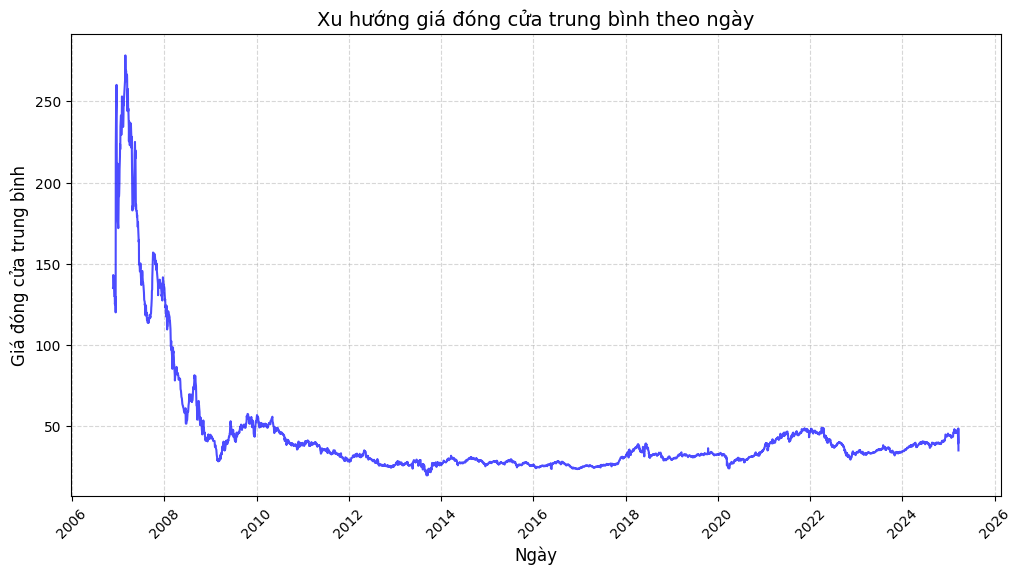

In [69]:
df_grouped = his_cost.groupby("transaction_date")["closing_price"].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, linestyle="-", color="b", alpha=0.7)

plt.title("Xu hướng giá đóng cửa trung bình theo ngày", fontsize=14)
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Giá đóng cửa trung bình", fontsize=12)
plt.xticks(rotation=45)  

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

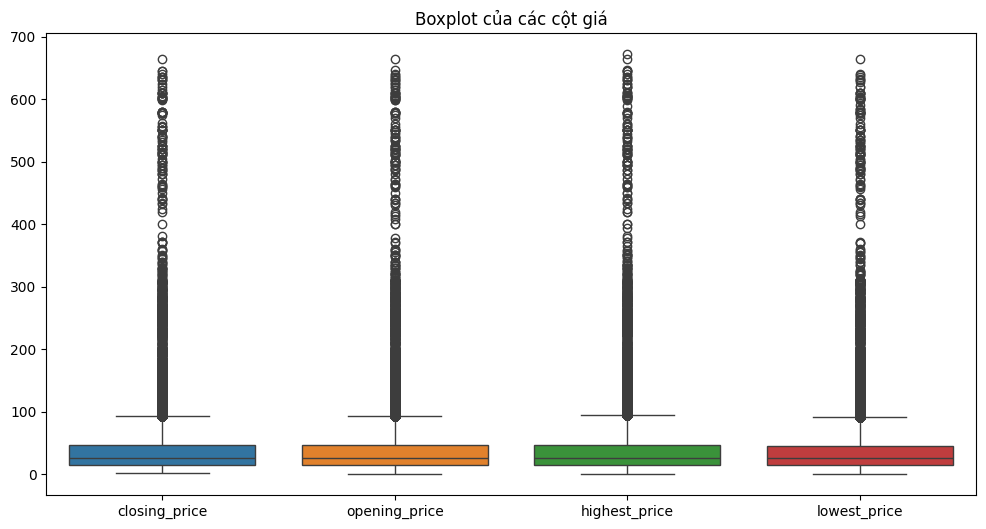

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=his_cost[['closing_price', 'opening_price', 'highest_price', 'lowest_price']])
plt.title("Boxplot của các cột giá")
plt.show()

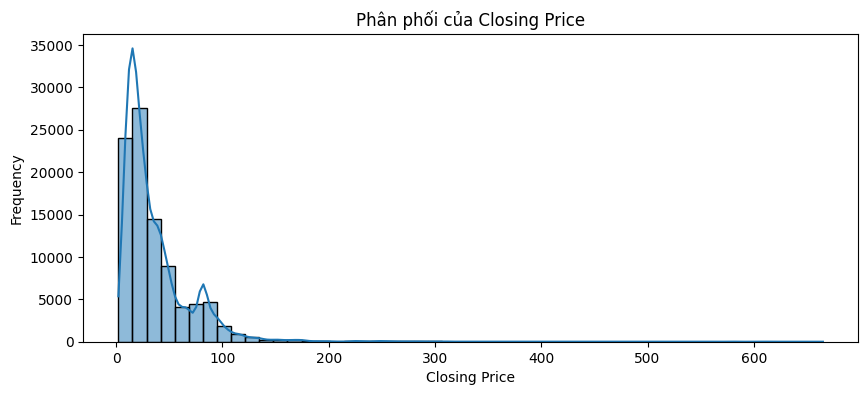

In [57]:
plt.figure(figsize=(10, 4))
sns.histplot(his_cost['closing_price'], bins=50, kde=True)
plt.title("Phân phối của Closing Price")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

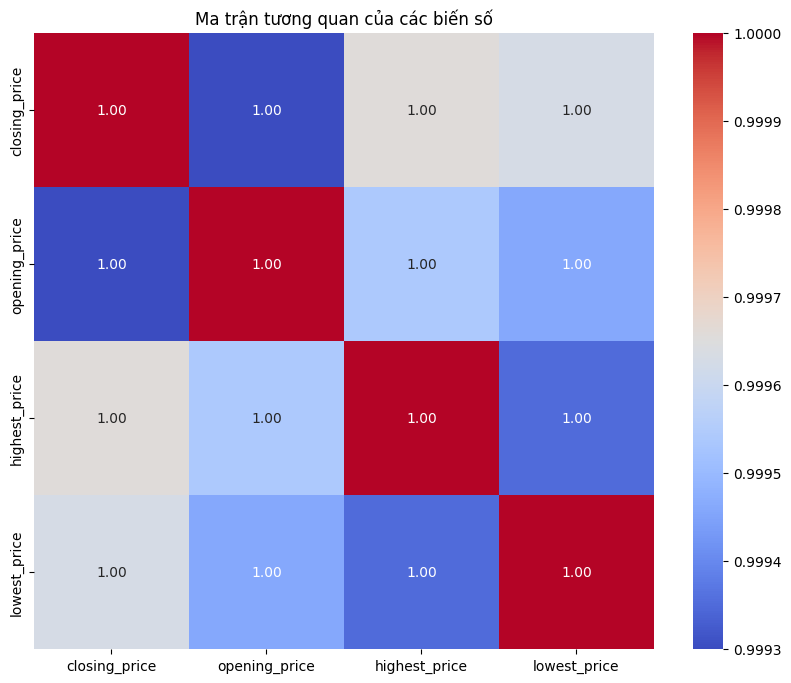

In [58]:
corr_matrix = his_cost[['closing_price', 'opening_price', 'highest_price', 'lowest_price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Ma trận tương quan của các biến số")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=his_cost[['closing_price', 'opening_price', 'highest_price', 'lowest_price']])
plt.title("Boxplot của các cột giá")
plt.show()

##### Khối lượng

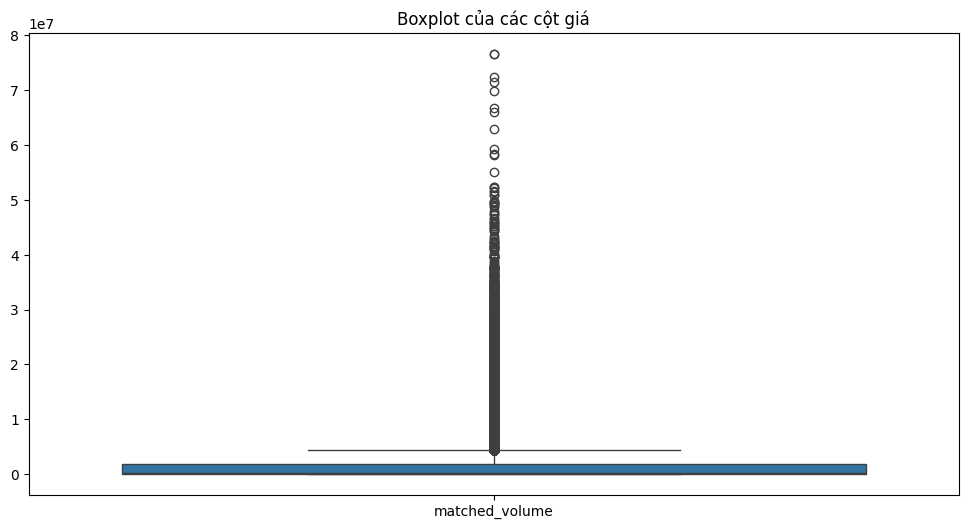

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=his_cost[['matched_volume']])
plt.title("Boxplot của các cột giá")
plt.show()

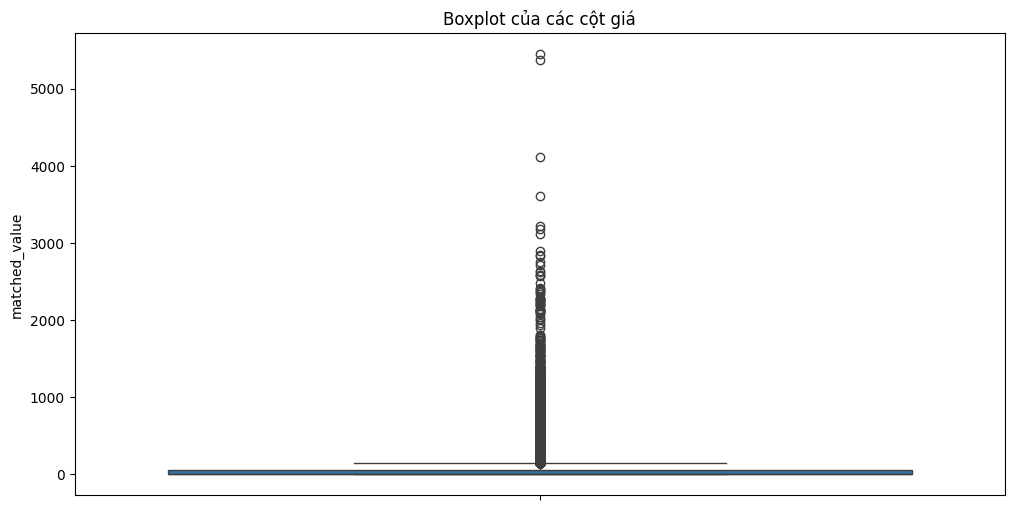

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=his_cost['matched_value'])
plt.title("Boxplot của các cột giá")
plt.show()

In [79]:
df_grouped = his_cost.groupby(['Ngành', 'transaction_date']).agg({
    'closing_price': 'sum',
    'matched_volume': 'sum',
})
df_grouped.head()

closing_price  matched_volume
Ngành        transaction_date                               
Bất Động Sản 2007-09-19                125.0          307840
             2007-09-20                131.0          794790
             2007-09-21                137.0         1224660
             2007-09-24                143.0          551130
             2007-09-25                150.0          962110

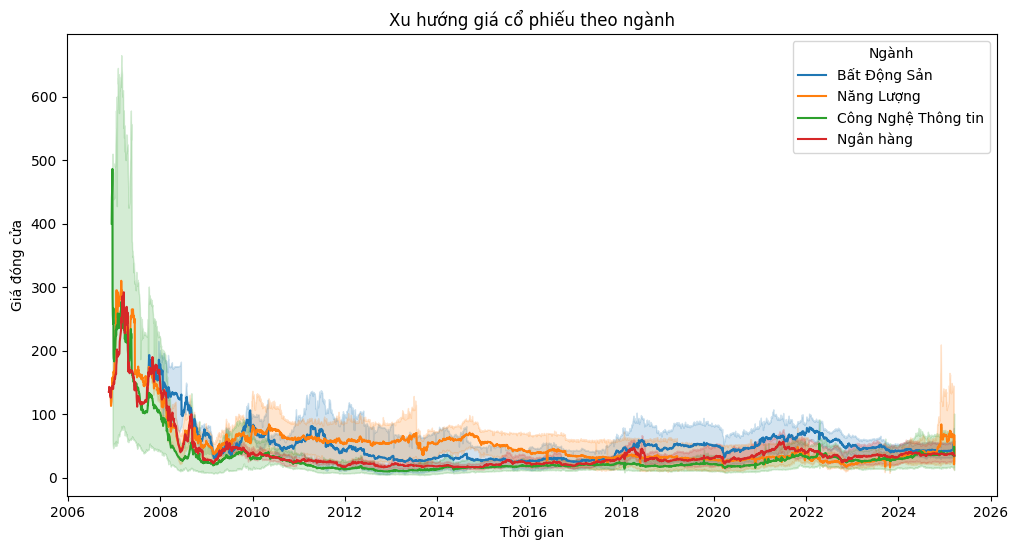

In [78]:
plt.figure(figsize=(12,6))
sns.lineplot(data=his_cost, x='transaction_date', y='closing_price', hue='Ngành')
plt.title('Xu hướng giá cổ phiếu theo ngành')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.legend(title='Ngành')
plt.show()

### Tiền xử lý transaction history

In [11]:
df = pd.read_csv(r'/home/hamornic/FinalXXX/DataScraped/Transaction History/transaction_history.csv', low_memory=False, index_col=0)
df.head()

,stock_code,transaction_date,closing_price,adjusted_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,...,sell_orders,sell_volume,avg_sell_volume_per_order,net_volume,proprietary_buy_volume,proprietary_buy_value,proprietary_sell_volume,proprietary_sell_value,proprietary_net_volume,proprietary_net_value
0,ABC,01/02/2018,14.8,11.75,-0.6(-3.90 %),"32,900",0.49,0,0,15.3,...,49,"48,200",984,"21,700",NaN,NaN,NaN,NaN,NaN,NaN
1,ABC,01/02/2019,9.2,7.3,0(0.00 %),"4,310",0.04,0,0,9.2,...,16,"10,100",631,"5,600",NaN,NaN,NaN,NaN,NaN,NaN
2,ABC,01/02/2021,15.9,13.87,-0.4(-2.45 %),"10,000",0.16,0,0,16,...,64,"60,200",941,"-18,500",NaN,NaN,NaN,NaN,NaN,NaN
3,ABC,01/02/2023,7.2,6.28,0(0.00 %),0,0.00,0,0,7.2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,ABC,01/02/2024,13.2,12.64,-0.2(-1.49 %),811,0.01,0,0,13.2,...,26,"36,700","1,412","-17,900",NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(168108, 36)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168108 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   stock_code                 168108 non-null  object 
 1   transaction_date           168108 non-null  object 
 2   closing_price              163607 non-null  object 
 3   adjusted_price             163607 non-null  object 
 4   change_hisCost             163607 non-null  object 
 5   matched_volume             163607 non-null  object 
 6   matched_value              163607 non-null  float64
 7   negotiated_volume          163607 non-null  object 
 8   negotiated_value           163607 non-null  object 
 9   opening_price              163607 non-null  object 
 10  highest_price              163607 non-null  object 
 11  lowest_price               163607 non-null  object 
 12  company_name_foriegnBlock  166111 non-null  object 
 13  change_foriegnBlock        166111 

Thay những giá trị bị thiếu của các cột ở bảng tự doanh = 0. Vì chỉ có một số ít các công ty tự doanh. 

In [14]:
df[['proprietary_buy_volume', 'proprietary_buy_value', 
    'proprietary_sell_volume', 'proprietary_sell_value', 
    'proprietary_net_volume', 'proprietary_net_value']] = df[
    ['proprietary_buy_volume', 'proprietary_buy_value', 
     'proprietary_sell_volume', 'proprietary_sell_value', 
     'proprietary_net_volume', 'proprietary_net_value']
].fillna(0)

In [15]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce', dayfirst=True)

In [16]:
df.dropna(subset=['transaction_date'], inplace=True) #Có một ngày vẫn bị lỗi nên cần xóa đi.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168107 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   stock_code                 168107 non-null  object        
 1   transaction_date           168107 non-null  datetime64[ns]
 2   closing_price              163607 non-null  object        
 3   adjusted_price             163607 non-null  object        
 4   change_hisCost             163607 non-null  object        
 5   matched_volume             163607 non-null  object        
 6   matched_value              163607 non-null  float64       
 7   negotiated_volume          163607 non-null  object        
 8   negotiated_value           163607 non-null  object        
 9   opening_price              163607 non-null  object        
 10  highest_price              163607 non-null  object        
 11  lowest_price               163607 non-null  object       

In [ ]:
cols_to_convert = ['closing_price', 'adjusted_price', 'matched_volume', 
                   'matched_value', 'negotiated_volume', 'negotiated_value', 'opening_price',
                   'highest_price', 'lowest_price', 'foreign_net_volume', 'foreign_net_value',
                   'foreign_buy_volume', 'foreign_buy_value', 'foreign_sell_volume', 
                   'foreign_sell_value', 'remaining_room',
                   'buy_orders', 'buy_volume', 'avg_buy_volume_per_order',
                   'sell_orders', 'sell_volume', 'avg_sell_volume_per_order', 'net_volume']
len(cols_to_convert)

23

In [19]:
df.head(30)

,stock_code,transaction_date,closing_price,adjusted_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,...,sell_orders,sell_volume,avg_sell_volume_per_order,net_volume,proprietary_buy_volume,proprietary_buy_value,proprietary_sell_volume,proprietary_sell_value,proprietary_net_volume,proprietary_net_value
0,ABC,2018-02-01,14.8,11.75,-0.6(-3.90 %),"32,900",0.49,0,0,15.3,...,49,"48,200",984,"21,700",0,0.0,0,0.0,0,0.0
1,ABC,2019-02-01,9.2,7.3,0(0.00 %),"4,310",0.04,0,0,9.2,...,16,"10,100",631,"5,600",0,0.0,0,0.0,0,0.0
2,ABC,2021-02-01,15.9,13.87,-0.4(-2.45 %),"10,000",0.16,0,0,16,...,64,"60,200",941,"-18,500",0,0.0,0,0.0,0,0.0
3,ABC,2023-02-01,7.2,6.28,0(0.00 %),0,0.00,0,0,7.2,...,0,0,0,0,0,0.0,0,0.0,0,0.0
4,ABC,2024-02-01,13.2,12.64,-0.2(-1.49 %),811,0.01,0,0,13.2,...,26,"36,700","1,412","-17,900",0,0.0,0,0.0,0,0.0
5,ABC,2017-03-01,35,15.67,0(0.00 %),"1,100",0.04,0,0,35,...,3,"10,300","3,433","-4,900",0,0.0,0,0.0,0,0.0
6,ABC,2018-03-01,16.2,12.86,0.3(1.89 %),"13,166",0.21,0,0,16,...,38,"30,000",789,"7,500",0,0.0,0,0.0,0,0.0
7,ABC,2019-03-01,9.6,7.62,0.2(2.13 %),"8,600",0.08,0,0,9.4,...,21,"19,400",924,900,0,0.0,0,0.0,0,0.0
8,ABC,2021-03-01,17.2,15,0.2(1.18 %),"40,019",0.68,0,0,17,...,53,"68,300","1,289","-10,400",0,0.0,0,0.0,0,0.0
9,ABC,2022-03-01,11.7,10.21,0.1(0.86 %),"93,034",1.05,0,0,11.6,...,94,"162,900","1,733","57,900",0,0.0,0,0.0,0,0.0


In [12]:
for col in cols_to_convert:
    # Thay dấu ',' bằng '' để tránh lỗi chuyển đổi
    df[col] = df[col].astype(str).str.replace(',', '', regex=True)
    
    # Chuyển đổi sang kiểu số, lỗi sẽ thành NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168107 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   stock_code                 168107 non-null  object        
 1   transaction_date           168107 non-null  datetime64[ns]
 2   closing_price              163599 non-null  float64       
 3   adjusted_price             144449 non-null  float64       
 4   change_hisCost             163607 non-null  object        
 5   matched_volume             163607 non-null  float64       
 6   matched_value              163607 non-null  float64       
 7   negotiated_volume          163607 non-null  float64       
 8   negotiated_value           163607 non-null  float64       
 9   opening_price              163607 non-null  float64       
 10  highest_price              163607 non-null  float64       
 11  lowest_price               163607 non-null  float64      

In [14]:
df['foreign_ownership'] = df[col] = pd.to_numeric(df['foreign_ownership'].str.replace('%', '', regex=True), errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168107 entries, 0 to 168107
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   stock_code                 168107 non-null  object        
 1   transaction_date           168107 non-null  datetime64[ns]
 2   closing_price              163599 non-null  float64       
 3   adjusted_price             144449 non-null  float64       
 4   change_hisCost             163607 non-null  object        
 5   matched_volume             163607 non-null  float64       
 6   matched_value              163607 non-null  float64       
 7   negotiated_volume          163607 non-null  float64       
 8   negotiated_value           163607 non-null  float64       
 9   opening_price              163607 non-null  float64       
 10  highest_price              163607 non-null  float64       
 11  lowest_price               163607 non-null  float64      

In [16]:
cols_convert = ['proprietary_buy_volume', 'proprietary_sell_volume', 'proprietary_net_volume']

In [17]:
for col in cols_convert:
    # Thay dấu ',' bằng '' để tránh lỗi chuyển đổi
    df[col] = df[col].astype(str).str.replace(',', '', regex=True)
    
    # Chuyển đổi sang kiểu số, lỗi sẽ thành NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
df.sort_values(by=['stock_code', 'transaction_date'], ascending=[True, True], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(20)

,stock_code,transaction_date,closing_price,adjusted_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,...,sell_orders,sell_volume,avg_sell_volume_per_order,net_volume,proprietary_buy_volume,proprietary_buy_value,proprietary_sell_volume,proprietary_sell_value,proprietary_net_volume,proprietary_net_value
0,ABC,2016-08-18,39.7,17.77,11.2(39.30 %),25400.0,1.00,0.0,0.0,39.9,...,39.0,27600.0,708.0,48.94,0,0.0,0,0.0,0,0.0
1,ABC,2016-08-19,37.5,16.78,-1.7(-4.34 %),23700.0,0.91,0.0,0.0,39.3,...,36.0,39700.0,1103.0,48.94,0,0.0,0,0.0,0,0.0
2,ABC,2016-08-22,36.0,16.11,-2.3(-6.01 %),13400.0,0.49,0.0,0.0,38.0,...,25.0,24200.0,968.0,48.95,0,0.0,0,0.0,0,0.0
3,ABC,2016-08-23,34.8,15.58,-1.8(-4.92 %),5000.0,0.18,0.0,0.0,36.0,...,12.0,14000.0,1167.0,48.95,0,0.0,0,0.0,0,0.0
4,ABC,2016-08-24,35.0,15.67,-0.3(-0.85 %),16000.0,0.56,0.0,0.0,34.8,...,10.0,30500.0,3050.0,48.95,0,0.0,0,0.0,0,0.0
5,ABC,2016-08-25,34.9,15.62,0(0.00 %),4100.0,0.14,0.0,0.0,34.6,...,14.0,54900.0,3921.0,48.95,0,0.0,0,0.0,0,0.0
6,ABC,2016-08-26,34.7,15.53,0(0.00 %),11400.0,0.39,0.0,0.0,34.0,...,18.0,27900.0,1550.0,48.96,0,0.0,0,0.0,0,0.0
7,ABC,2016-08-29,34.8,15.58,0.5(1.46 %),1100.0,0.04,0.0,0.0,34.8,...,6.0,48200.0,8033.0,48.96,0,0.0,0,0.0,0,0.0
8,ABC,2016-08-30,34.5,15.44,-0.3(-0.86 %),10210.0,0.34,0.0,0.0,34.0,...,13.0,23600.0,1815.0,48.96,0,0.0,0,0.0,0,0.0
9,ABC,2016-08-31,34.5,15.44,0.7(2.07 %),1100.0,0.04,0.0,0.0,34.5,...,5.0,10300.0,2060.0,48.96,0,0.0,0,0.0,0,0.0


In [19]:
df[df['closing_price'].isna()]

,stock_code,transaction_date,closing_price,adjusted_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,...,sell_orders,sell_volume,avg_sell_volume_per_order,net_volume,proprietary_buy_volume,proprietary_buy_value,proprietary_sell_volume,proprietary_sell_value,proprietary_net_volume,proprietary_net_value
887,ABC,2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,49.00,0,0.0,0,0.00,0,0.00
1134,ABC,2021-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.0,42200.0,612.0,0.00,0,0.0,0,0.00,0,0.00
1158,ABC,2021-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108.0,78500.0,727.0,0.00,0,0.0,0,0.00,0,0.00
1176,ABC,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.0,92200.0,1197.0,0.00,0,0.0,0,0.00,0,0.00
1334,ABC,2021-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,358.0,304100.0,849.0,0.00,0,0.0,0,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167038,YEG,2020-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.0,143160.0,2272.0,29.97,0,0.0,0,0.00,0,0.00
168078,YEG,2025-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1184.0,3474700.0,2935.0,0.00,0,0.0,0,0.00,0,0.00
168104,YEG,2025-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2734.0,9392900.0,3436.0,0.00,0,0.0,0,0.00,0,0.00
168105,YEG,2025-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0,0.0,20000,0.32,-20000,-0.32


In [20]:
df.isna().sum()

stock_code                       0
transaction_date                 0
closing_price                 4508
adjusted_price               23658
change_hisCost                4500
matched_volume                4500
matched_value                 4500
negotiated_volume             4500
negotiated_value              4500
opening_price                 4500
highest_price                 4500
lowest_price                  4500
company_name_foriegnBlock     1997
change_foriegnBlock           1997
foreign_net_volume            1997
foreign_net_value             1997
foreign_buy_volume            1997
foreign_buy_value             1997
foreign_sell_volume           1997
foreign_sell_value            1997
remaining_room                1997
foreign_ownership             1999
change_orderStat              3621
buy_orders                    3621
buy_volume                    3621
avg_buy_volume_per_order      3621
sell_orders                   3621
sell_volume                   3621
avg_sell_volume_per_

-------------------------

In [21]:
his_cost = df[['stock_code', 'transaction_date', 'closing_price', 'change_hisCost', 'matched_volume', 'matched_value', 'negotiated_volume',
'negotiated_value',
'opening_price',
'highest_price',
'lowest_price']]

In [22]:
his_cost=his_cost[~his_cost['closing_price'].isna()]

In [23]:
his_cost.head()

,stock_code,transaction_date,closing_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price
0,ABC,2016-08-18,39.7,11.2(39.30 %),25400.0,1.00,0.0,0.0,39.9,39.9,36.3
1,ABC,2016-08-19,37.5,-1.7(-4.34 %),23700.0,0.91,0.0,0.0,39.3,39.3,37.5
2,ABC,2016-08-22,36.0,-2.3(-6.01 %),13400.0,0.49,0.0,0.0,38.0,38.0,36.0
3,ABC,2016-08-23,34.8,-1.8(-4.92 %),5000.0,0.18,0.0,0.0,36.0,36.0,34.7
4,ABC,2016-08-24,35.0,-0.3(-0.85 %),16000.0,0.56,0.0,0.0,34.8,35.0,34.8


In [24]:
his_cost.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163599 entries, 0 to 168103
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   stock_code         163599 non-null  object        
 1   transaction_date   163599 non-null  datetime64[ns]
 2   closing_price      163599 non-null  float64       
 3   change_hisCost     163599 non-null  object        
 4   matched_volume     163599 non-null  float64       
 5   matched_value      163599 non-null  float64       
 6   negotiated_volume  163599 non-null  float64       
 7   negotiated_value   163599 non-null  float64       
 8   opening_price      163599 non-null  float64       
 9   highest_price      163599 non-null  float64       
 10  lowest_price       163599 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 15.0+ MB


In [25]:
his_cost = his_cost.drop_duplicates()

In [26]:
his_cost.describe()

,transaction_date,closing_price,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price
count,135164,135164.000000,1.351640e+05,135164.000000,1.351640e+05,135164.000000,135164.000000,135164.000000,135164.000000
mean,2017-12-18 13:36:32.003787776,21.541454,4.335855e+04,1.290799,4.132799e+03,0.142485,21.519867,21.764863,21.261301
min,2003-02-12 00:00:00,0.700000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2014-02-18 00:00:00,9.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,9.000000,9.100000,9.000000
50%,2018-10-18 00:00:00,13.400000,3.000000e+02,0.000000,0.000000e+00,0.000000,13.400000,13.500000,13.200000
75%,2022-02-14 00:00:00,20.500000,6.700000e+03,0.100000,0.000000e+00,0.000000,20.500000,20.800000,20.300000
max,2025-03-10 00:00:00,1434.700000,1.356900e+07,373.110000,9.900000e+06,2352.000000,1562.500000,1562.500000,1358.700000
std,NaN,45.261943,2.391333e+05,8.523747,9.742261e+04,7.902972,45.336355,45.979069,44.587722


In [27]:
his_cost['change_hisCost']

0         11.2(39.30 %)
1         -1.7(-4.34 %)
2         -2.3(-6.01 %)
3         -1.8(-4.92 %)
4         -0.3(-0.85 %)
              ...      
168099      0.6(3.75 %)
168100    -0.8(-4.82 %)
168101      0.2(1.27 %)
168102    -0.1(-0.62 %)
168103     0.05(0.31 %)
Name: change_hisCost, Length: 135164, dtype: object

In [28]:
his_cost[['change', 'percent']] = his_cost['change_hisCost'].str.extract(r"([-\d.]+)\(([-\d.]+) %\)")

his_cost['change'] = his_cost['change'].astype(float)
his_cost['percent'] = his_cost['percent'].astype(float)

In [29]:
his_cost

,stock_code,transaction_date,closing_price,change_hisCost,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price,change,percent
0,ABC,2016-08-18,39.70,11.2(39.30 %),25400.0,1.00,0.0,0.0,39.90,39.90,36.30,11.20,39.30
1,ABC,2016-08-19,37.50,-1.7(-4.34 %),23700.0,0.91,0.0,0.0,39.30,39.30,37.50,-1.70,-4.34
2,ABC,2016-08-22,36.00,-2.3(-6.01 %),13400.0,0.49,0.0,0.0,38.00,38.00,36.00,-2.30,-6.01
3,ABC,2016-08-23,34.80,-1.8(-4.92 %),5000.0,0.18,0.0,0.0,36.00,36.00,34.70,-1.80,-4.92
4,ABC,2016-08-24,35.00,-0.3(-0.85 %),16000.0,0.56,0.0,0.0,34.80,35.00,34.80,-0.30,-0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168099,YEG,2025-03-04,16.60,0.6(3.75 %),6680800.0,110.95,0.0,0.0,16.10,17.10,15.90,0.60,3.75
168100,YEG,2025-03-05,15.80,-0.8(-4.82 %),3995700.0,65.22,0.0,0.0,16.70,16.90,15.80,-0.80,-4.82
168101,YEG,2025-03-06,16.00,0.2(1.27 %),2894100.0,45.91,0.0,0.0,16.05,16.15,15.70,0.20,1.27
168102,YEG,2025-03-07,15.90,-0.1(-0.62 %),2182400.0,34.88,0.0,0.0,16.05,16.35,15.80,-0.10,-0.62


In [30]:
his_cost.drop(columns=['change_hisCost'], inplace=True)

In [ ]:
his_cost.to_csv(r'/home/hamornic/FinalXXX/DataScraped/Transaction History/Processed Data/History-Cost.csv', index=False, encoding='utf-8-sig')

In [ ]:
his_cost

,stock_code,transaction_date,closing_price,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price,change,percent
0,ABC,2016-08-18,39.70,25400.0,1.00,0.0,0.0,39.90,39.90,36.30,11.20,39.30
1,ABC,2016-08-19,37.50,23700.0,0.91,0.0,0.0,39.30,39.30,37.50,-1.70,-4.34
2,ABC,2016-08-22,36.00,13400.0,0.49,0.0,0.0,38.00,38.00,36.00,-2.30,-6.01
3,ABC,2016-08-23,34.80,5000.0,0.18,0.0,0.0,36.00,36.00,34.70,-1.80,-4.92
4,ABC,2016-08-24,35.00,16000.0,0.56,0.0,0.0,34.80,35.00,34.80,-0.30,-0.85
...,...,...,...,...,...,...,...,...,...,...,...,...
168099,YEG,2025-03-04,16.60,6680800.0,110.95,0.0,0.0,16.10,17.10,15.90,0.60,3.75
168100,YEG,2025-03-05,15.80,3995700.0,65.22,0.0,0.0,16.70,16.90,15.80,-0.80,-4.82
168101,YEG,2025-03-06,16.00,2894100.0,45.91,0.0,0.0,16.05,16.15,15.70,0.20,1.27
168102,YEG,2025-03-07,15.90,2182400.0,34.88,0.0,0.0,16.05,16.35,15.80,-0.10,-0.62


In [31]:
df_monthly = df.groupby([
    'stock_code',
    pd.Grouper(key='transaction_date', freq='ME')  
]).agg({
    'closing_price': ['sum', 'mean'],  
    'matched_volume': ['sum', 'mean']
}).reset_index()

In [32]:
df_monthly

stock_code transaction_date closing_price            matched_volume  \
                                           sum       mean            sum   
0           ABC       2016-08-31        356.40  35.640000       111410.0   
1           ABC       2016-09-30        696.50  33.166667        41300.0   
2           ABC       2016-10-31        667.20  31.771429        28700.0   
3           ABC       2016-11-30        775.60  35.254545        68600.0   
4           ABC       2016-12-31        819.10  37.231818        57900.0   
...         ...              ...           ...        ...            ...   
6777        YEG       2024-11-30        231.25  11.011905     47295800.0   
6778        YEG       2024-12-31        364.15  16.552273    116298400.0   
6779        YEG       2025-01-31        269.95  15.879412     79654400.0   
6780        YEG       2025-02-28        289.50  15.236842     49912800.0   
6781        YEG       2025-03-31         96.25  16.041667     22363900.0   

                    
              mean  
0     1.114100e+04  
1     1.966667e+03  
2     1.366667e+03  
3     3.118182e+03  
4     2.631818e+03  
...            ...  
6777  2.252181e+06  
6778  5.286291e+06  
6779  4.685553e+06  
6780  2.626989e+06  
6781  3.727317e+06  

[6782 rows x 6 columns]

In [33]:
df_quarterly = df.groupby([  
    'stock_code',  
    pd.Grouper(key='transaction_date', freq='QE')  
]).agg({  
    'closing_price': ['sum', 'mean'],  
    'matched_volume': ['sum', 'mean']
}).reset_index()

In [34]:
df_quarterly

stock_code transaction_date closing_price            matched_volume  \
                                           sum       mean            sum   
0           ABC       2016-09-30       1052.90  33.964516       152710.0   
1           ABC       2016-12-31       2261.90  34.798462       155200.0   
2           ABC       2017-03-31       2142.80  36.318644        72910.0   
3           ABC       2017-06-30       2156.10  35.345902       586530.0   
4           ABC       2017-09-30       1427.70  22.661905      4228433.0   
...         ...              ...           ...        ...            ...   
2275        YEG       2024-03-31        631.40  10.701695     84167400.0   
2276        YEG       2024-06-30        575.63   9.436557     78039000.0   
2277        YEG       2024-09-30        604.93   9.452031     77405300.0   
2278        YEG       2024-12-31        818.01  12.394091    201717400.0   
2279        YEG       2025-03-31        655.70  15.611905    151931100.0   

                    
              mean  
0     4.926129e+03  
1     2.387692e+03  
2     1.235763e+03  
3     9.615246e+03  
4     6.711798e+04  
...            ...  
2275  1.426566e+06  
2276  1.279328e+06  
2277  1.209458e+06  
2278  3.056324e+06  
2279  3.617407e+06  

[2280 rows x 6 columns]

### Visual

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df_fox = his_cost[his_cost['stock_code'] == 'FOX']
df_fox.head()

,stock_code,transaction_date,closing_price,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price,change,percent
54452,FOX,2017-01-13,75.6,600.0,0.05,0.0,0.0,75.6,75.6,75.6,21.6,40.00
54453,FOX,2017-01-16,86.9,10400.0,0.90,0.0,0.0,86.9,86.9,86.9,11.3,14.95
54454,FOX,2017-01-17,99.9,64517.0,6.44,0.0,0.0,99.9,99.9,99.0,13.0,14.96
54455,FOX,2017-01-18,109.0,10387.0,1.10,0.0,0.0,114.6,114.6,100.0,9.2,9.22
54456,FOX,2017-01-19,104.0,36126.0,3.68,0.0,0.0,107.0,107.0,100.0,-2.0,-1.89


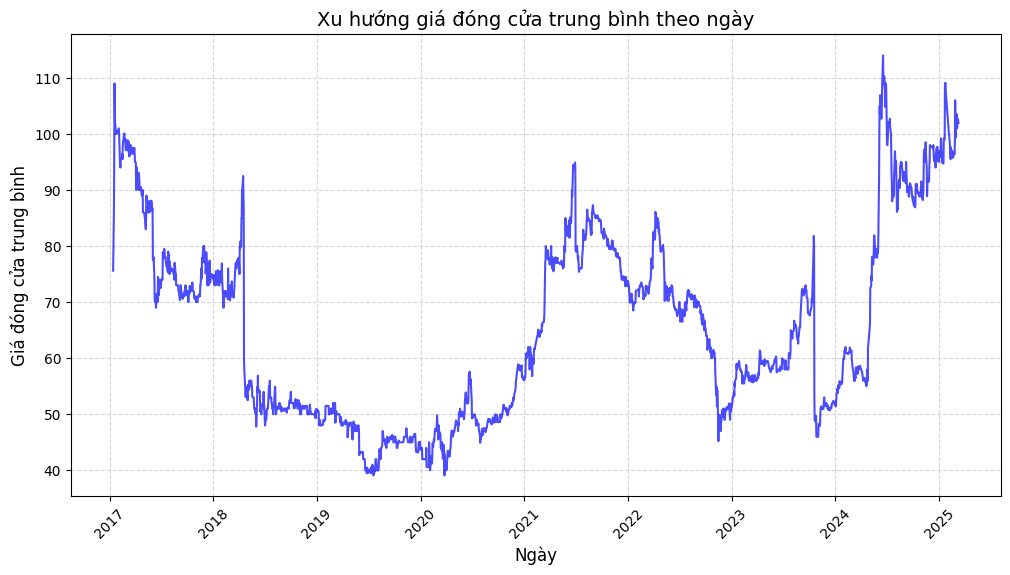

In [ ]:
df_grouped = df_fox.groupby("transaction_date")["closing_price"].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, linestyle="-", color="b", alpha=0.7)

plt.title("Xu hướng giá đóng cửa trung bình theo ngày", fontsize=14)
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Giá đóng cửa trung bình", fontsize=12)
plt.xticks(rotation=45)  

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

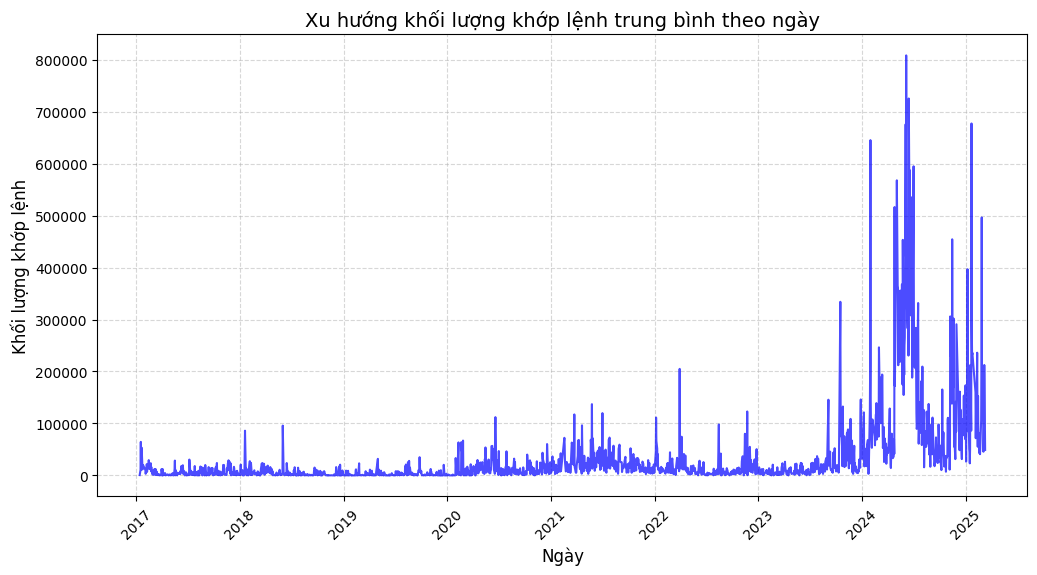

In [43]:
df_grouped = df_fox.groupby("transaction_date")["matched_volume"].mean()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, linestyle="-", color="b", alpha=0.7)

plt.title("Xu hướng khối lượng khớp lệnh trung bình theo ngày", fontsize=14)
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Khối lượng khớp lệnh", fontsize=12)
plt.xticks(rotation=45)  

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### Theo tháng

In [86]:
df_fox_monthly = df_monthly[df_monthly['stock_code'] == 'FOX']
df_fox_monthly.head()

stock_code transaction_date closing_price            matched_volume  \
                                           sum       mean            sum   
2638        FOX       2017-01-31         877.7  97.522222       222187.0   
2639        FOX       2017-02-28        1853.2  97.536842       255110.0   
2640        FOX       2017-03-31        2236.7  97.247826        87501.0   
2641        FOX       2017-04-30        1722.1  90.636842        34394.0   
2642        FOX       2017-05-31        1819.8  86.657143        96860.0   

                    
              mean  
2638  24687.444444  
2639  13426.842105  
2640   3804.391304  
2641   1810.210526  
2642   4612.380952

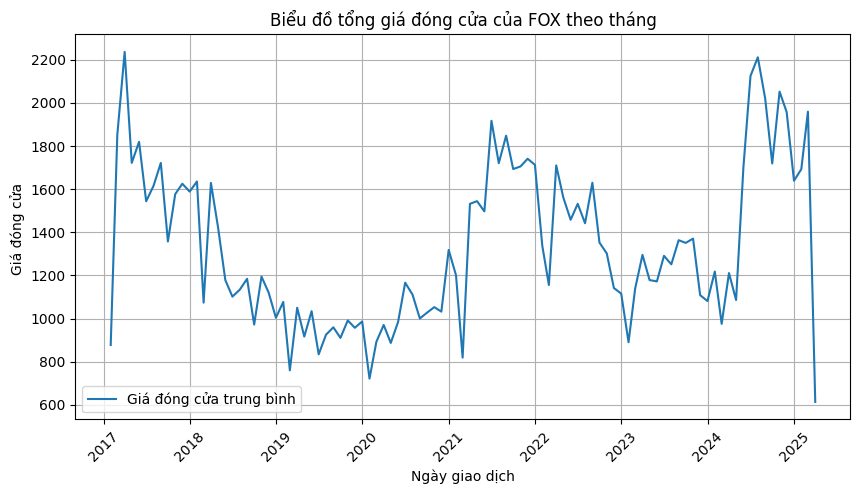

In [62]:
# Vẽ biểu đồ đường giá đóng cửa trung bình theo thời gian
plt.figure(figsize=(10, 5))
plt.plot(df_fox_monthly["transaction_date"], df_fox_monthly["closing_price"]["sum"], linestyle="-", color="tab:blue", label="Giá đóng cửa trung bình")

plt.xlabel("Ngày giao dịch")
plt.ylabel("Giá đóng cửa ")
plt.title("Biểu đồ tổng giá đóng cửa của FOX theo tháng")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Xoay nhãn trục X để dễ đọc
plt.show()

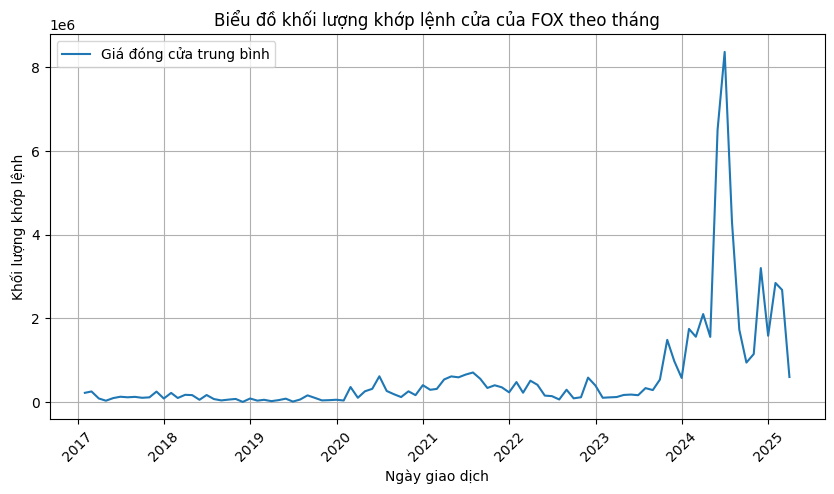

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(df_fox_monthly["transaction_date"], df_fox_monthly["matched_volume"]["sum"], linestyle="-", color="tab:blue", label="Giá đóng cửa trung bình")

plt.xlabel("Ngày giao dịch")
plt.ylabel("Khối lượng khớp lệnh")
plt.title("Biểu đồ khối lượng khớp lệnh cửa của FOX theo tháng")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Xoay nhãn trục X để dễ đọc
plt.show()

#### Theo quý

In [64]:
df_fox_quarterly = df_quarterly[df_quarterly['stock_code'] == 'FOX']
df_fox_quarterly.head()

stock_code transaction_date closing_price            matched_volume  \
                                          sum       mean            sum   
887        FOX       2017-03-31        4967.6  97.403922       564798.0   
888        FOX       2017-06-30        5086.0  83.377049       260222.0   
889        FOX       2017-09-30        4694.6  74.517460       345736.0   
890        FOX       2017-12-31        4791.7  73.718462       453079.0   
891        FOX       2018-03-31        4339.1  73.544068       494569.0   

                   
             mean  
887  11074.470588  
888   4265.934426  
889   5487.873016  
890   6970.446154  
891   8382.525424

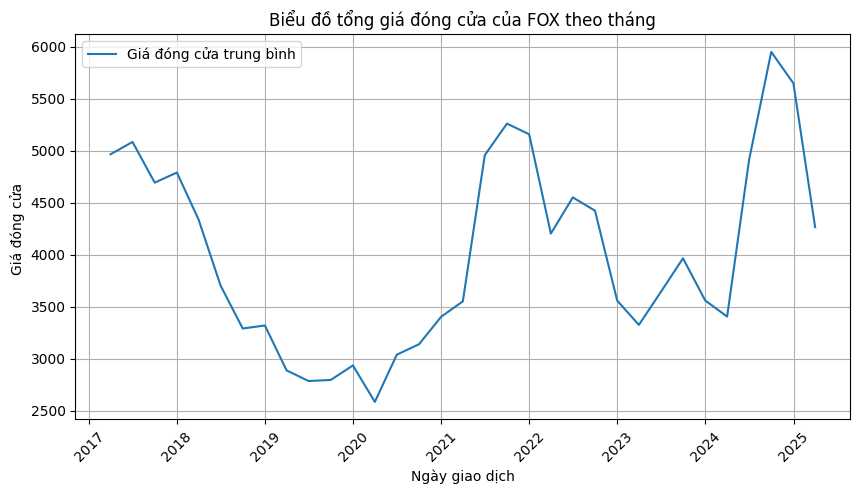

In [ ]:
# Vẽ biểu đồ đường giá đóng cửa trung bình theo thời gian
plt.figure(figsize=(10, 5))
plt.plot(df_fox_quarterly["transaction_date"], df_fox_quarterly["closing_price"]["sum"], linestyle="-", color="tab:blue", label="Giá đóng cửa trung bình")

plt.xlabel("Ngày giao dịch")
plt.ylabel("Giá đóng cửa ")
plt.title("Biểu đồ tổng giá đóng cửa của FOX theo quý")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Xoay nhãn trục X để dễ đọc
plt.show()

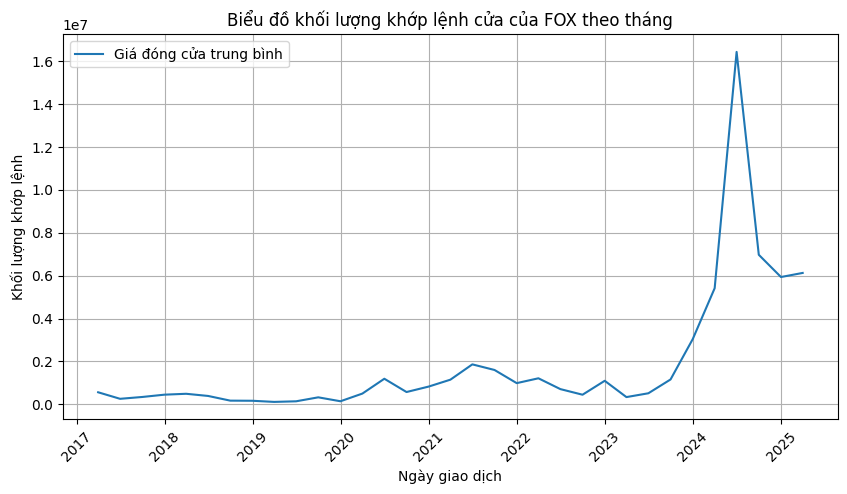

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(df_fox_quarterly["transaction_date"], df_fox_quarterly["matched_volume"]["sum"], linestyle="-", color="tab:blue", label="Giá đóng cửa trung bình")

plt.xlabel("Ngày giao dịch")
plt.ylabel("Khối lượng khớp lệnh")
plt.title("Biểu đồ khối lượng khớp lệnh cửa của FOX theo tháng")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Xoay nhãn trục X để dễ đọc
plt.show()

In [67]:
import mplfinance as mpf

In [89]:
df_fox

,stock_code,transaction_date,closing_price,matched_volume,matched_value,negotiated_volume,negotiated_value,opening_price,highest_price,lowest_price,change,percent
54452,FOX,2017-01-13,75.6,600.0,0.05,0.0,0.0,75.6,75.6,75.6,21.6,40.00
54453,FOX,2017-01-16,86.9,10400.0,0.90,0.0,0.0,86.9,86.9,86.9,11.3,14.95
54454,FOX,2017-01-17,99.9,64517.0,6.44,0.0,0.0,99.9,99.9,99.0,13.0,14.96
54455,FOX,2017-01-18,109.0,10387.0,1.10,0.0,0.0,114.6,114.6,100.0,9.2,9.22
54456,FOX,2017-01-19,104.0,36126.0,3.68,0.0,0.0,107.0,107.0,100.0,-2.0,-1.89
...,...,...,...,...,...,...,...,...,...,...,...,...
56478,FOX,2025-03-04,102.0,45557.0,4.63,0.0,0.0,102.7,102.7,101.0,-0.5,-0.49
56479,FOX,2025-03-05,101.0,59805.0,6.06,0.0,0.0,101.6,102.8,101.0,-0.6,-0.59
56480,FOX,2025-03-06,102.7,93721.0,9.55,0.0,0.0,101.3,102.7,101.3,1.4,1.38
56481,FOX,2025-03-07,102.7,212471.0,22.14,0.0,0.0,102.7,106.0,102.7,0.8,0.79


In [90]:
df_fox_monthly = df_fox.groupby([
    'stock_code',
    pd.Grouper(key='transaction_date', freq='ME')  
]).agg({
    'opening_price': 'sum',
    'highest_price': 'sum',
    'lowest_price': 'sum',
    'closing_price': 'sum',  
    'matched_volume': 'sum'
}).reset_index()

In [91]:
df_fox_monthly

,stock_code,transaction_date,opening_price,highest_price,lowest_price,closing_price,matched_volume
0,FOX,2017-01-31,883.0,887.5,860.5,877.7,222187.0
1,FOX,2017-02-28,1842.6,1866.9,1824.7,1853.2,255110.0
2,FOX,2017-03-31,2241.3,2245.6,2232.5,2236.7,87501.0
3,FOX,2017-04-30,1719.6,1729.5,1717.9,1722.1,34394.0
4,FOX,2017-05-31,1823.0,1829.9,1813.5,1819.8,96860.0
...,...,...,...,...,...,...,...
94,FOX,2024-11-30,1954.5,1993.2,1926.4,1957.9,3203755.0
95,FOX,2024-12-31,1643.5,1661.2,1627.4,1639.4,1586574.0
96,FOX,2025-01-31,1685.9,1721.3,1663.9,1693.0,2847896.0
97,FOX,2025-02-28,1865.5,1888.6,1840.0,1864.2,2445752.0


In [93]:
df_fox_monthly.set_index('transaction_date', inplace=True)

In [94]:
df_fox_monthly = df_fox_monthly.rename(columns={
    "opening_price": "Open",
    "highest_price": "High",
    "lowest_price": "Low",
    "closing_price": "Close",
    "matched_volume": "Volume"
})

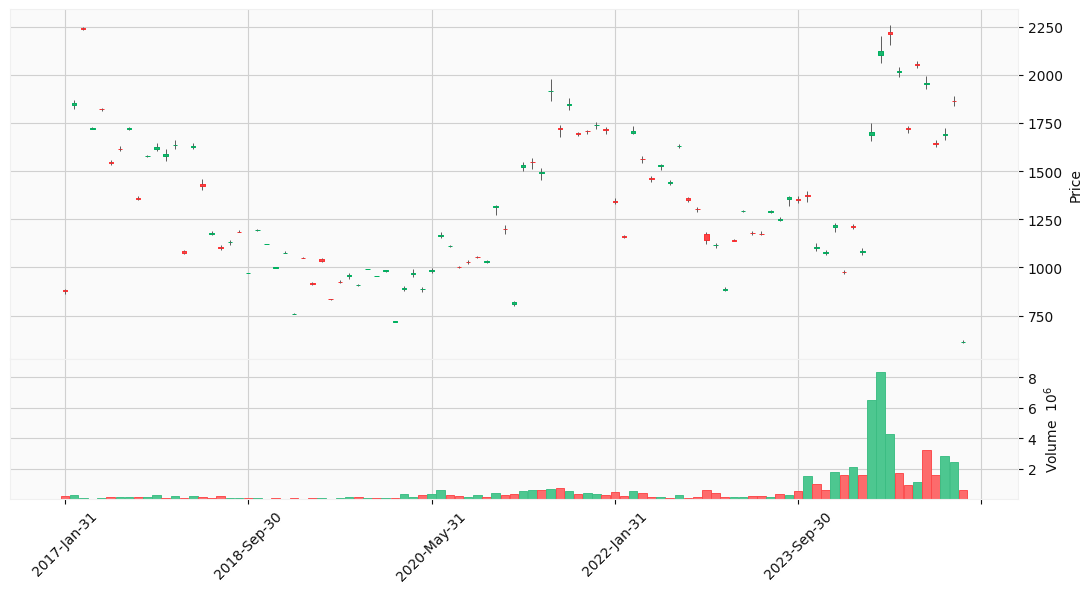

In [103]:
mpf.plot(df_fox_monthly, type='candle',volume=True,figratio=(5,2),style='yahoo', figsize=(14, 7))

In [104]:
df_fox_quarterly = df_fox.groupby([
    'stock_code',
    pd.Grouper(key='transaction_date', freq='QE')  
]).agg({
    'opening_price': 'sum',
    'highest_price': 'sum',
    'lowest_price': 'sum',
    'closing_price': 'sum',  
    'matched_volume': 'sum'
}).reset_index()

In [ ]:
df_fox_quarterly.set_index('transaction_date', inplace=True)
df_fox_quarterly = df_fox_quarterly.rename(columns={
    "opening_price": "Open",
    "highest_price": "High",
    "lowest_price": "Low",
    "closing_price": "Close",
    "matched_volume": "Volume"
})

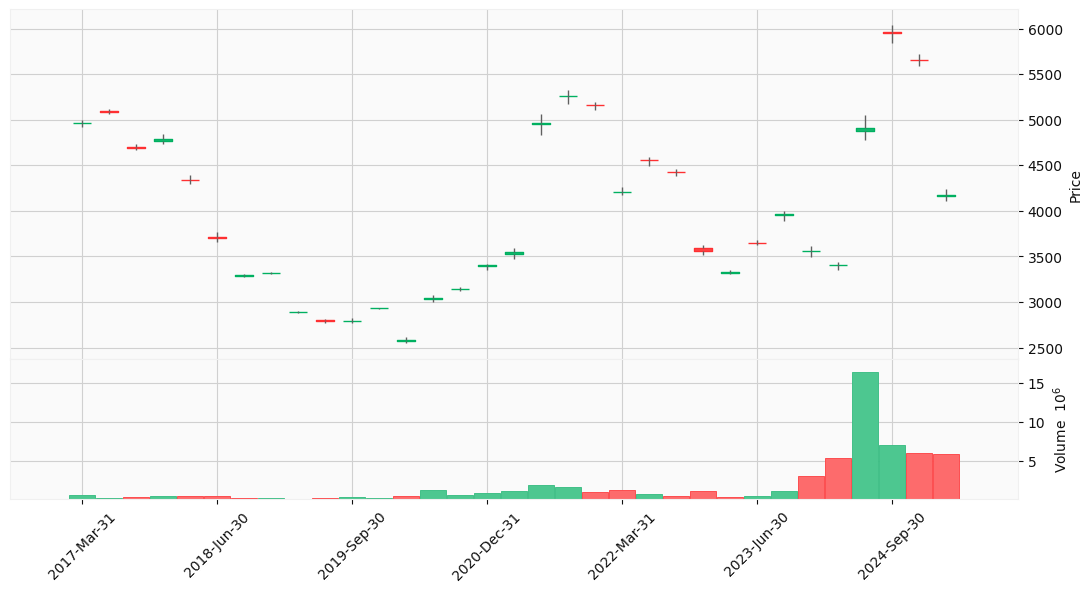

In [112]:
mpf.plot(df_fox_quarterly, type='candle',volume=True,figratio=(5,2),style='yahoo', figsize=(14, 7))